### Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from scipy import stats
import math

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
df = pd.read_csv('/content/yeast.csv', index_col=0, header=None, delim_whitespace=True)

In [ ]:
df.columns = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'name']

In [ ]:
df.head(2)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


In [ ]:
df.isna().sum().rename('null').to_frame().T

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
null,0,0,0,0,0,0,0,0,0


No Null vallues in any column of data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,0.500121,0.137299,0.11,0.41,0.49,0.58,1.00
gvh,1484.0,0.499933,0.123924,0.13,0.42,0.49,0.57,1.00
alm,1484.0,0.500034,0.086670,0.21,0.46,0.51,0.55,1.00
mit,1484.0,0.261186,0.137098,0.00,0.17,0.22,0.32,1.00
erl,1484.0,0.504717,0.048351,0.50,0.50,0.50,0.50,1.00
pox,1484.0,0.007500,0.075683,0.00,0.00,0.00,0.00,0.83
vac,1484.0,0.499885,0.057797,0.00,0.48,0.51,0.53,0.73
nuc,1484.0,0.276199,0.106491,0.00,0.22,0.22,0.30,1.00


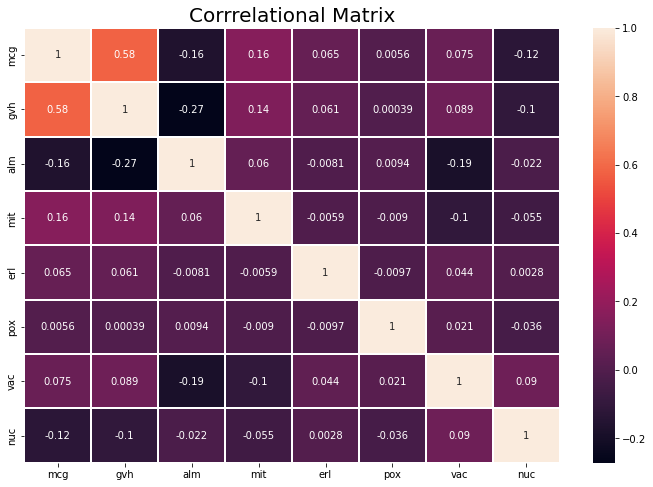

In [ ]:
corr = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, linewidth=1)

plt.title('Corrrelational Matrix', fontsize=20)
plt.show()

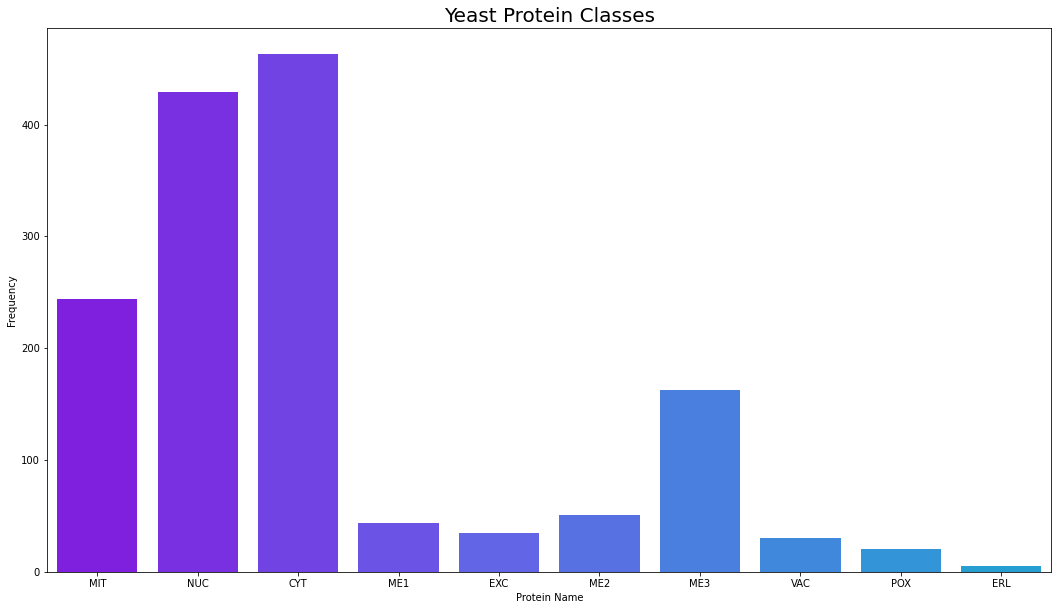

In [ ]:
plt.figure(figsize=(18, 10))

colours = plt.cm.rainbow(np.linspace(0, 1, 40))
sns.countplot(data=df, x='name', palette=colours)

plt.title('Yeast Protein Classes', fontsize=20)
plt.xlabel('Protein Name')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_counts = df['name'].value_counts().to_frame()

df_counts.T

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,ERL
name,463,429,244,163,51,44,35,30,20,5


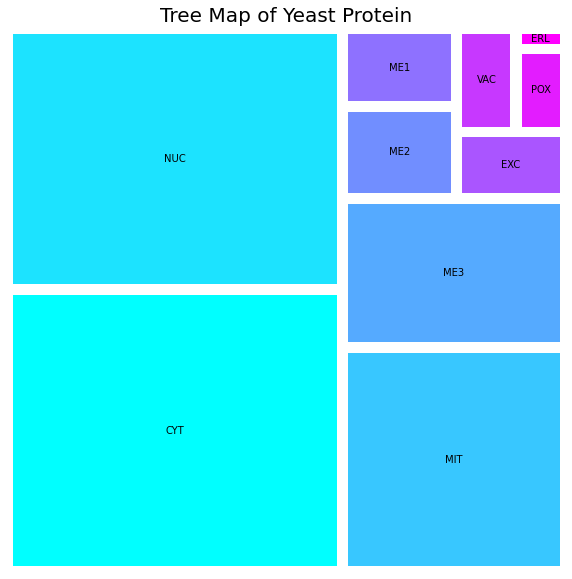

In [ ]:
plt.figure(figsize=(10, 10))

color = plt.cm.cool(np.linspace(0, 1,10))
squarify.plot(sizes=df_counts.values, label=df_counts.index, pad=True, color=color)

plt.title('Tree Map of Yeast Protein', fontsize=20)
plt.axis('off')
plt.show()

Shuffeled the data

In [ ]:
df.sample(frac=1).reset_index(drop=True)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.54,0.57,0.52,0.19,0.5,0.0,0.59,0.67,NUC
1,0.78,0.74,0.58,0.25,1.0,0.0,0.53,0.22,ERL
2,0.37,0.48,0.50,0.26,0.5,0.0,0.52,0.39,NUC
3,0.55,0.49,0.50,0.46,0.5,0.0,0.52,0.25,MIT
4,0.46,0.38,0.51,0.20,0.5,0.0,0.51,0.22,CYT
...,...,...,...,...,...,...,...,...,...
1479,0.45,0.46,0.55,0.43,0.5,0.0,0.55,0.38,NUC
1480,0.38,0.61,0.61,0.12,0.5,0.0,0.53,0.47,CYT
1481,0.29,0.40,0.41,0.48,0.5,0.0,0.53,0.30,NUC
1482,0.46,0.43,0.38,0.33,0.5,0.0,0.48,0.28,MIT


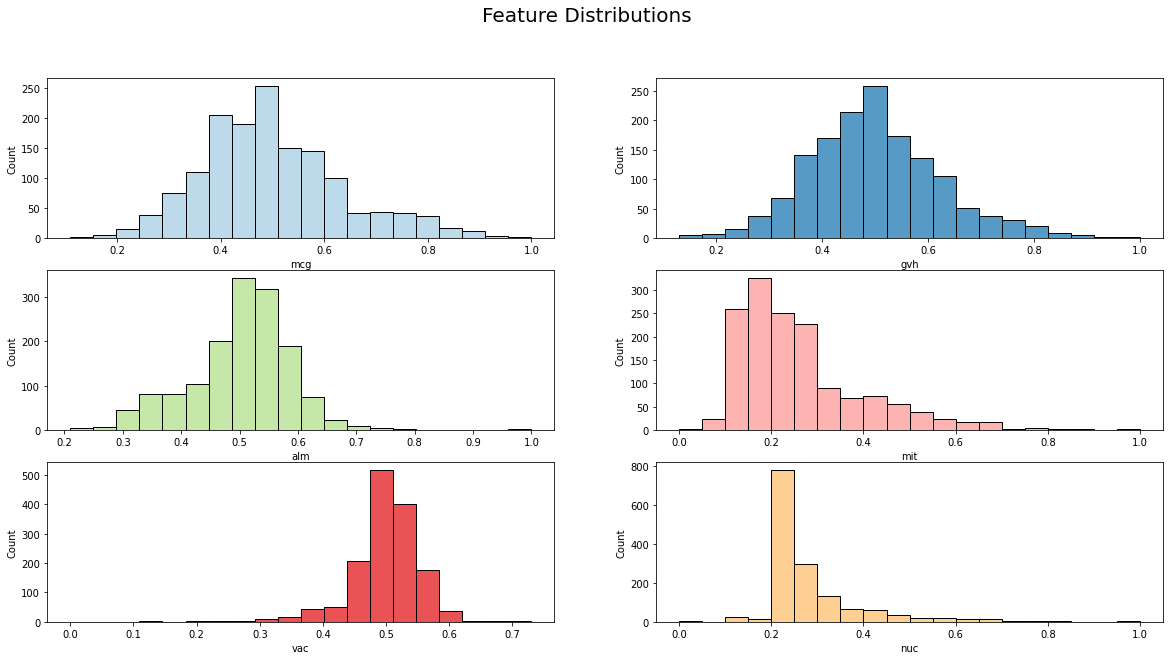

In [ ]:
x_num = ['mcg', 'gvh', 'alm', 'mit', 'vac', 'nuc']

fig, ax = plt.subplots(3, 2, figsize=(20, 10))

color = plt.cm.Paired(np.linspace(0, 1, 10))
for i, col in enumerate(x_num):
    sns.histplot(df[col], bins=20, kde=False, color=color[i] , ax=ax[i//2, i%2])

fig.suptitle('Feature Distributions', fontsize=20)
plt.show()

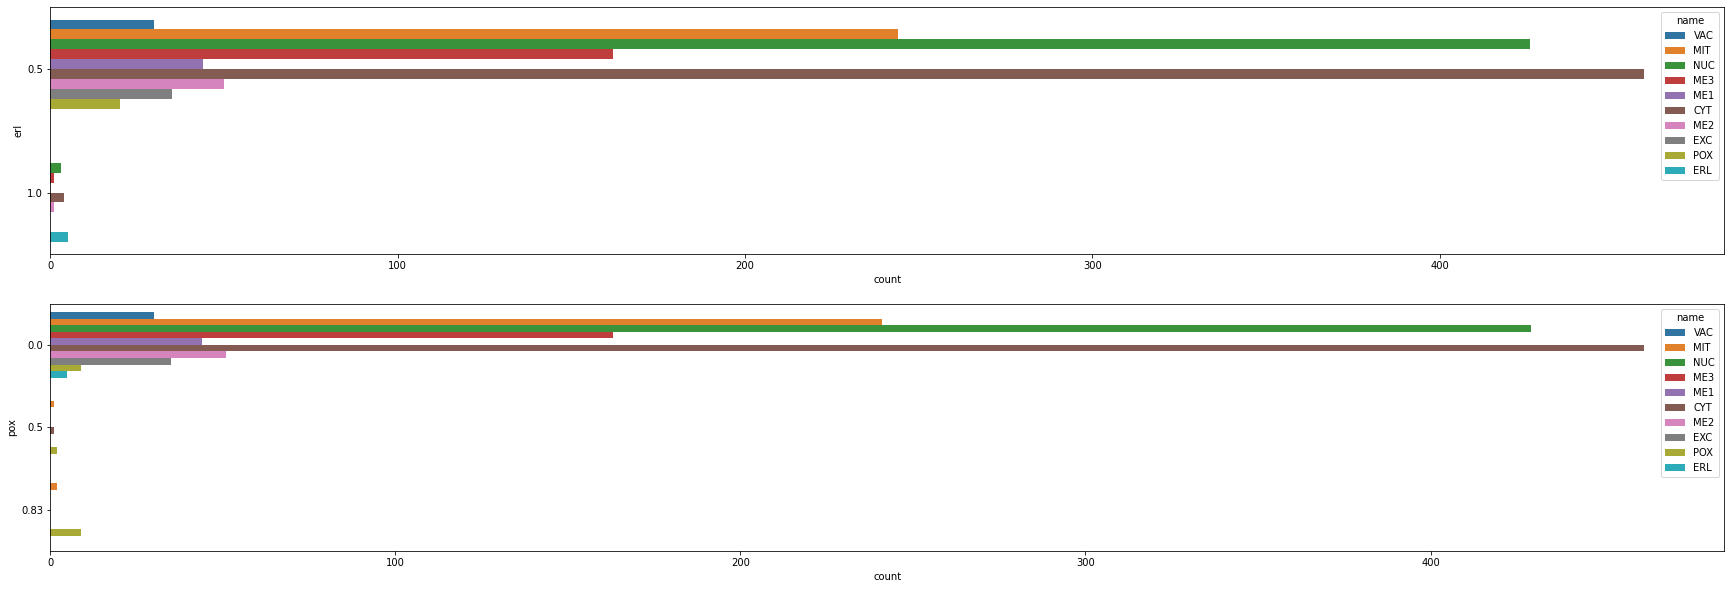

In [ ]:
x_cat = ['erl', 'pox']

fig, ax = plt.subplots(2, 1, figsize=(30, 10))

for i, col in enumerate(x_cat):
    sns.countplot(data=df, y=col, hue='name', ax=ax[i])

* `erl` - has 2 catogories
* `pox` - has 3 categories

In [ ]:
OH_encoder = OneHotEncoder(sparse=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[x_cat]))

OH_cols.index = df.index
OH_cols.columns = [f'ohe{i}' for i in range(OH_cols.shape[1])]

num_df = df.drop(x_cat, axis=1)

df_full = pd.concat([num_df, OH_cols], axis=1)

In [ ]:
df_full

,mcg,gvh,alm,mit,vac,nuc,name,ohe0,ohe1,ohe2,ohe3,ohe4
0,0.44,0.35,0.55,0.14,0.52,0.22,VAC,1.0,0.0,1.0,0.0,0.0
1,0.57,0.59,0.50,0.58,0.53,0.22,MIT,1.0,0.0,1.0,0.0,0.0
2,0.36,0.49,0.55,0.21,0.55,0.33,NUC,1.0,0.0,1.0,0.0,0.0
3,0.39,0.28,0.46,0.12,0.41,0.22,NUC,1.0,0.0,1.0,0.0,0.0
4,0.39,0.16,0.59,0.08,0.51,0.27,NUC,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0.78,0.73,0.27,0.28,0.56,0.22,ME1,1.0,0.0,1.0,0.0,0.0
1480,0.60,0.37,0.52,0.15,0.55,0.26,VAC,1.0,0.0,1.0,0.0,0.0
1481,0.71,0.50,0.50,0.18,0.46,0.22,CYT,1.0,0.0,1.0,0.0,0.0
1482,0.49,0.37,0.59,0.17,0.51,0.22,NUC,1.0,0.0,1.0,0.0,0.0


In [ ]:
encoder = LabelEncoder()

df_full['name'] = encoder.fit_transform(df_full['name'].values)

## Logistic Resgression :
### CASE - I

In [ ]:
np.random.seed(42)

X = df_full.copy().drop('name', axis=1)
y = df_full['name'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
Xtrain_full, ytrain_full = Xtrain.copy(), pd.DataFrame(ytrain.copy())

kfold = KFold(n_splits=5, shuffle=True)

scores = []

for train_idx, valid_idx in kfold.split(Xtrain_full):
    Xtrain = Xtrain_full.iloc[train_idx]
    Xvalid = Xtrain_full.iloc[valid_idx]

    ytrain = ytrain_full.iloc[train_idx]
    yvalid = ytrain_full.iloc[valid_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(Xtrain, ytrain.values.ravel())

    auc_score = model.score(Xvalid, yvalid)
    scores.append(auc_score)

np.array(scores)

array([0.52941176, 0.58403361, 0.49367089, 0.54008439, 0.58649789])

In [ ]:
np.mean(scores)

0.5467397085416446

### CASE - II

1:9 is the split for testing and training data

* Variance of this model is high
* Underfit is due to the training model

In [ ]:
np.random.seed(42)

X = df_full.copy().drop('name', axis=1)
y = df_full['name'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.9)

In [ ]:
Xtrain_full, ytrain_full = Xtrain.copy(), pd.DataFrame(ytrain.copy())

kfold = KFold(n_splits=5, shuffle=True)

scores = []

for train_idx, valid_idx in kfold.split(Xtrain_full):
    Xtrain = Xtrain_full.iloc[train_idx]
    Xvalid = Xtrain_full.iloc[valid_idx]

    ytrain = ytrain_full.iloc[train_idx]
    yvalid = ytrain_full.iloc[valid_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(Xtrain, ytrain.values.ravel())

    auc_score = model.score(Xvalid, yvalid)
    scores.append(auc_score)

np.array(scores)

array([0.5       , 0.3       , 0.53333333, 0.48275862, 0.44827586])

In [ ]:
np.mean(scores)

0.4528735632183908

**Accuracy Scores on:**

* `LogisticRegression Case-1` - 0.5425415735914619
* `LogisticRegression Case-2` - 0.4528735632183908
**Model Analysis :**

* The accuracy score on kfold cross validation is low which result in the underfit model



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# TODO : Use Optuna
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_prob_pred = model.predict_proba(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f'Training Accuracy : {acc_train}')
print(f'Testing Accuracy : {acc_test}')

Training Accuracy : 0.5669755686604886
Testing Accuracy : 0.5353535353535354


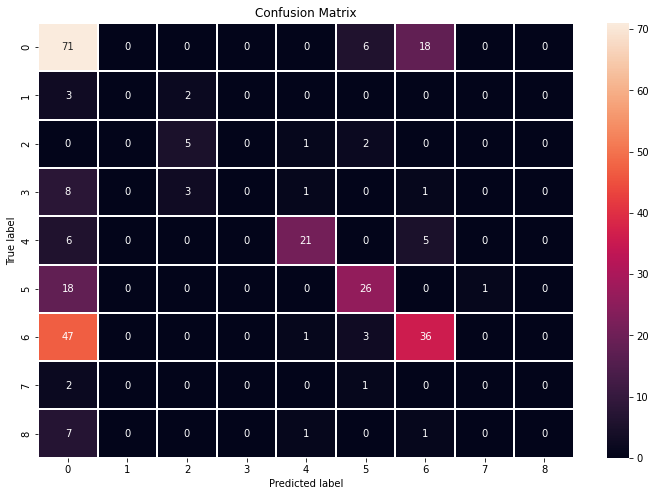

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 8))

sns.heatmap(cm, annot=True, linewidth=1)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forests :

In [ ]:
model = RandomForestClassifier(
    n_estimators=50, max_depth=6, criterion='entropy',
    min_samples_leaf=1, min_samples_split=2
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f'Training Accuracy : {acc_train}')
print(f'Testing Accuracy : {acc_test}')

Training Accuracy : 0.7042965459140691
Testing Accuracy : 0.5723905723905723


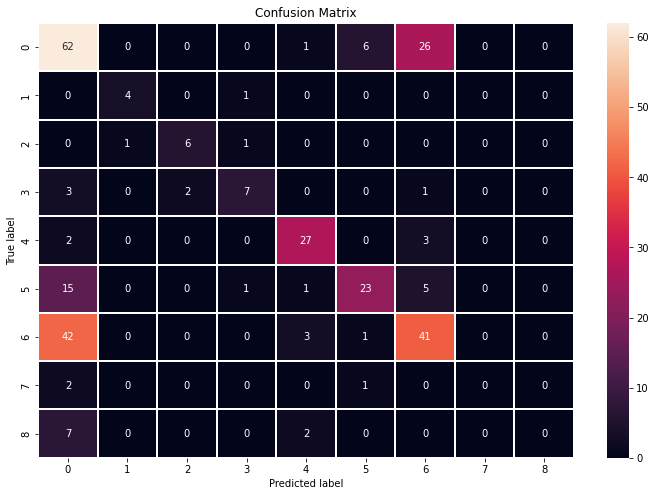

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 8))

sns.heatmap(cm, annot=True, linewidth=1)

plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## MLE :

In [ ]:
def var_type(col):
    if len(df_full[col].unique()) < len(df_full[col]):
        return 'discrete'
    else:
        return 'continous'


def cal_L_max_norm(col):
    mu, sigma = df_full[col].mean(), df_full[col].std()
    L_max = np.sum(np.log(stats.norm.pdf(df_full[col], loc=mu, scale=sigma)))
    return L_max


def cal_L_max_rayleigh(col):
    tf = np.array(df_full[col])
    sigma = np.sqrt(np.mean(tf ** 2) / 2)
    L_max = np.sum(np.log((tf / sigma ** 2)) * (math.e ** -(tf ** 2 / (2 * sigma ** 2))))
    return L_max

def distribution_type(col):
    col_type = var_type(col)

    if col_type == 'discrete':
        if len(df_full[col].unique() == 2):
            print(f'{col} : binomial distribution')
        else:
            print(f'{col} : multinomial distribution')
    else:
        x, y = cal_L_max_norm(col), cal_L_max_rayleigh(col)

        if x > y:
            print(f'{col} : normal distribution')
            print(f'{col} : rayleigh distribution')

In [ ]:
for col in X.columns:
    distribution_type(col)

mcg : binomial distribution
gvh : binomial distribution
alm : binomial distribution
mit : binomial distribution
vac : binomial distribution
nuc : binomial distribution
ohe0 : binomial distribution
ohe1 : binomial distribution
ohe2 : binomial distribution
ohe3 : binomial distribution
ohe4 : binomial distribution


In [ ]:
class MLClassifier:
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        '''
        # no. of variables / dimension
        self.d = x.shape[1]

        # no. of classes; assumes labels to be integers from 0 to nclasses-1
        self.nclasses = len(set(y))

        # list of means; mu_list[i] is mean vector for label i
        self.mu_list = []

        # list of inverse covariance matrices;
        # sigma_list[i] is inverse covariance matrix for label i
        # for efficiency reasons we store only the inverses
        self.sigma_inv_list = []

        # list of scalars in front of e^...
        self.scalars = []

        n = x.shape[0]
        for i in range(self.nclasses):

            # subset of obesrvations for label i
            cls_x = np.array([x[j] for j in range(n) if y[j] == i])

            mu = np.mean(cls_x, axis=0)

            noise = 1e-4 * np.random.rand(1 + self.nclasses, 1 + self.nclasses)
            # rowvar = False, this is to use columns as variables instead of rows
            sigma = np.cov(cls_x, rowvar=False)
            if np.sum(np.linalg.eigvals(sigma) <= 0) != 0:
                # if at least one eigenvalue is <= 0 show warning
                print(f'Warning! Covariance matrix for label cls is not positive definite!\n')

            sigma_inv = np.linalg.inv(sigma + noise)

            scalar = 1/np.sqrt(1 + ((2*np.pi)**self.d)*np.linalg.det(sigma))

            self.mu_list.append(mu)
            self.sigma_inv_list.append(sigma_inv)
            self.scalars.append(scalar)

    def _class_likelihood(self, x: np.ndarray, cls: int) -> float:
        '''
        x - numpy array of shape (d,)
        cls - class label

        Returns: likelihood of x under the assumption that class label is cls
        '''
        mu = self.mu_list[cls]
        sigma_inv = self.sigma_inv_list[cls]
        scalar = self.scalars[cls]
        d = self.d

        exp = (-1/2)*np.dot(np.matmul(x-mu, sigma_inv), x-mu)

        return scalar * (np.e**exp)

    def predict(self, x: np.ndarray) -> int:
        '''
        x - numpy array of shape (d,)
        Returns: predicted label
        '''
        likelihoods = [self._class_likelihood(x, i) for i in range(self.nclasses)]
        return np.argmax(likelihoods)

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        '''
        x - numpy array of shape (n, d); n = #observations; d = #variables
        y - numpy array of shape (n,)
        Returns: accuracy of predictions
        '''
        n = x.shape[0]
        predicted_y = np.array([self.predict(x[i]) for i in range(n)])
        n_correct = np.sum(predicted_y == y)
        return n_correct/n

In [ ]:
X_train.to_numpy().shape

(1187, 11)

In [ ]:
model = MLClassifier()
model.fit(X_train.to_numpy(), y_train)

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

Warning! Covariance matrix for label cls is not positive definite!

